In [42]:
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


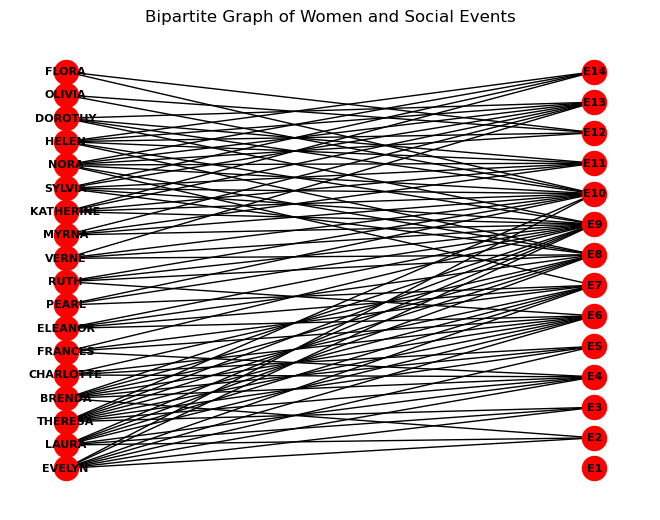

In [43]:
# Data placed into csv and read into code, assigned row and column labels.
url = "https://raw.githubusercontent.com/evanmclaughlin/DATA-620/main/data.v1.csv"
data = pd.read_csv(url, index_col=0)
data = data.reset_index()
row_labels = data.iloc[:, 0].tolist()
column_labels = data.columns[1:].tolist()

# We'll start with creating the graph, assigning the nodes, and adding the edges so that we can start to visualize our attendance patterns.
Graph = nx.Graph()
Graph.add_nodes_from(row_labels, bipartite=0)
Graph.add_nodes_from(column_labels, bipartite=1)
for i, row_label in enumerate(row_labels):
    for j, column_label in enumerate(column_labels):
        if data.iloc[i, j] == 1:
            Graph.add_edge(row_label, column_label)
            
# Let's next create a bipartite graph
pos = nx.bipartite_layout(Graph, row_labels)
nx.draw(Graph, pos, with_labels=True, font_weight='bold', node_color='red', font_size=8)
plt.title("Bipartite Graph of Women and Social Events")
plt.show()

The above image illustrates which women attended which events. We can also start to establish which women attend the same events, a beginning step in gaining insights into social clusters within the population. 

In [44]:
# The greedy modularity communities algorithm can be employed for community detection, followed by generating a 
# mapping of nodes to community
communities = list(nx.algorithms.community.greedy_modularity_communities(G))
community_mapping = {node: i for i, comm in enumerate(communities) for node in comm}


For the bipartite graph above, the greedy modularity helps identify which groups of women are more closely connected. That is, it highlights clusters within the datset. The resulting communities are used to color nodes in the bipartite graph, providing a visual representation of the detected social groups and enhancing our understanding of the structure and dynamics of the relationships in the given social network.

C:\Users\Evan\AppData\Local\Temp\ipykernel_34716\1135136424.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(communities))


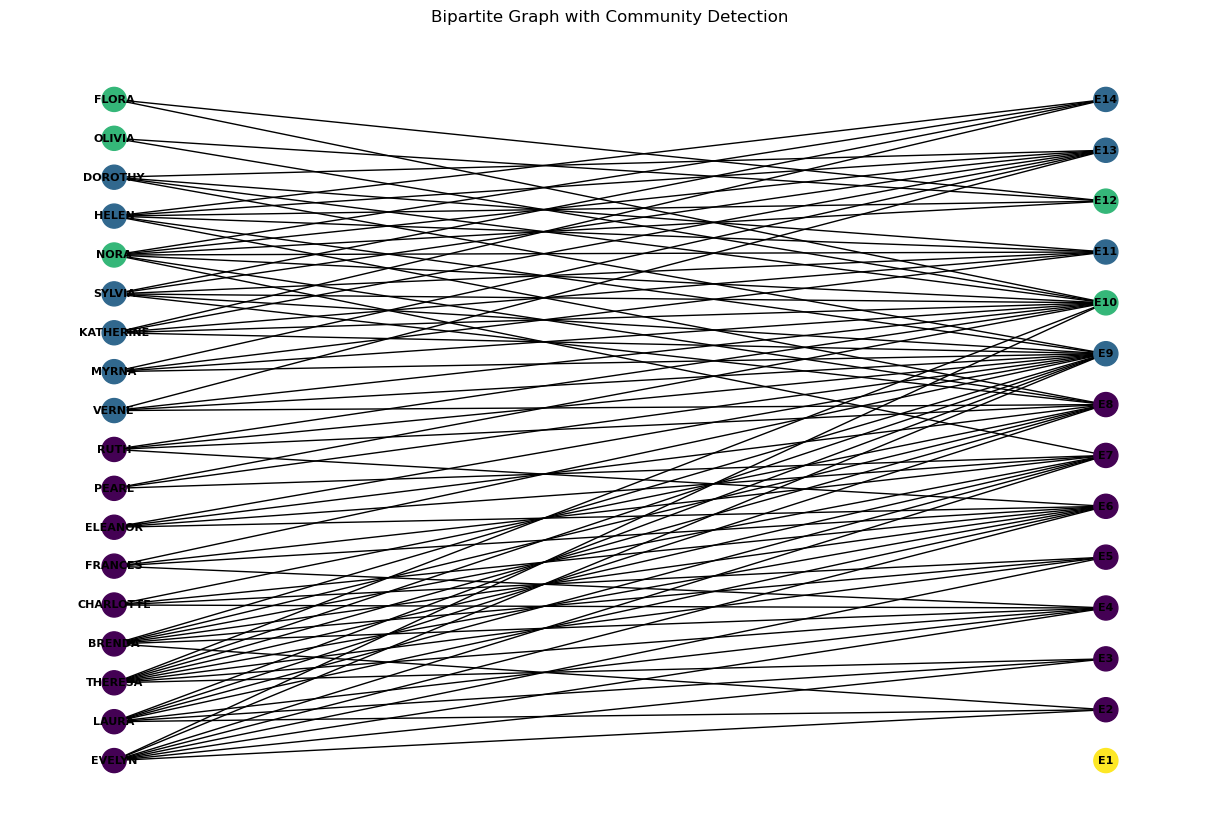

In [45]:
# Next we'll create a graph to view the communities 
plt.figure(figsize=(12, 8))
pos = nx.bipartite_layout(G, row_labels)
cmap = plt.cm.get_cmap('viridis', len(communities))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=[community_mapping[node] for node in G.nodes()], cmap=cmap, font_size=8)
plt.title("Bipartite Graph with Community Detection")
plt.show()



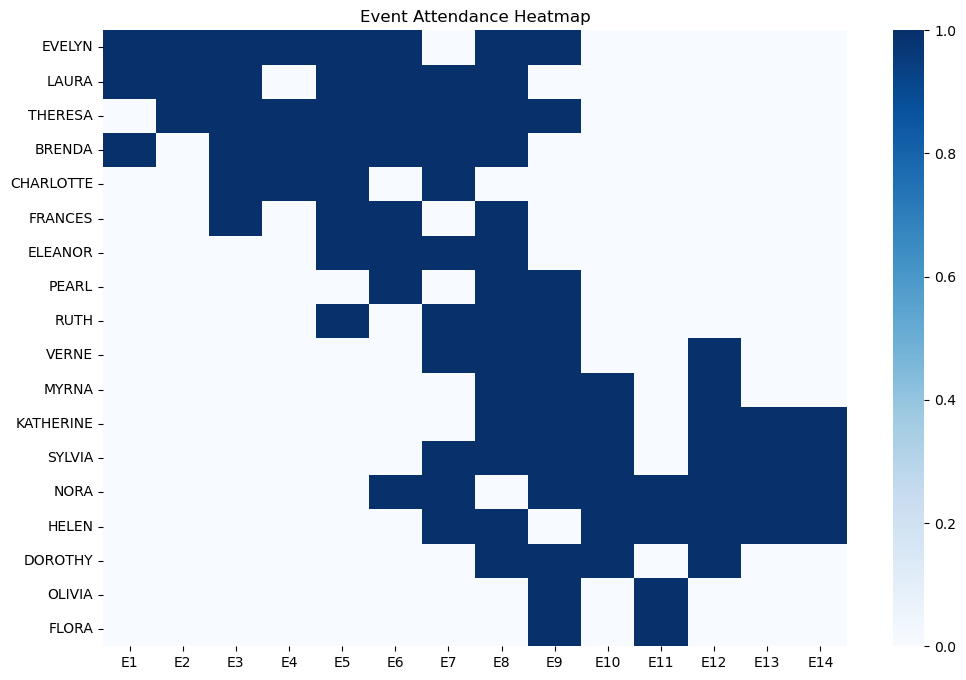

In [46]:
# Last, we'll look at how the women overlap at which events.
plt.figure(figsize=(12, 8))
sns.heatmap(data.iloc[:, 1:], cmap="Blues", xticklabels=column_labels, yticklabels=row_labels)
plt.title("Event Attendance Heatmap")
plt.show()

This last graphic illustrates the full attendance patterns of each woman, and shows how they overlap with one another, just a little extra context for our analysis. It also shows us which events were sparsely attended and which were well attended. 
We could use this to determine which types of events are were more popular for this community. 

Our analysis gives some insight into the social practices of a group of Southern women across 14 events. Trends begin to take shape but ultimately demonstrate non-uniform distribution of associations and cliques with shared attendance behaviors. 